## Import necessary libraries

In [209]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [210]:
df = pd.read_csv("data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dropping unwanted columns

In [48]:
df.drop(['PassengerId', 'Pclass', 'SibSp','Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [49]:
df.head()

,Survived,Name,Sex,Age,Fare
0,0,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,1,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,0,"Allen, Mr. William Henry",male,35.0,8.0500


## Checking the data types of the Features(columns)

In [50]:
df.dtypes

Survived      int64
Name         object
Sex          object
Age         float64
Fare        float64
dtype: object

## Visualizing the correlation between the variables using HeatMaps

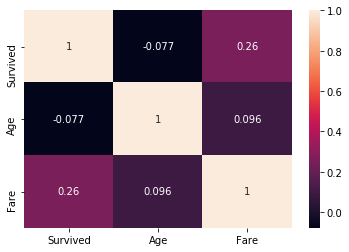

In [51]:
sns.heatmap(df.corr(), annot = True)

## Visualizing the null values using of HeatMaps

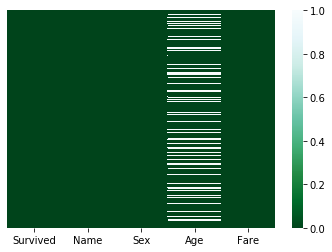

In [53]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='BuGn_r')

## Calculating the mean of 'Age' column to fill the missing or Null values

In [54]:
me = df['Age'].mean()
me

29.69911764705882

In [55]:
mean = 30

In [56]:
df['Age'].fillna(value= mean, inplace=True)

In [57]:
count = df['Age'].value_counts()
count.head()

30.0    202
24.0     30
22.0     27
18.0     26
28.0     25
Name: Age, dtype: int64

## Visualizing the data after filing the null values

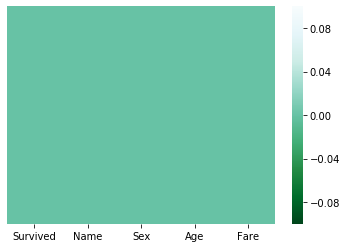

In [58]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='BuGn_r')

## Ploting the dataset based on age of the passanger

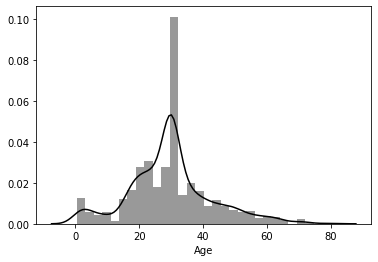

In [70]:
sns.distplot(df.Age, color = 'black')

## Deviding the Features and the Target value

In [75]:
features = df.drop('Survived' , axis = 'columns')
target = df['Survived']

In [76]:
features.head()

,Name,Sex,Age,Fare
0,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,"Allen, Mr. William Henry",male,35.0,8.0500


In [77]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Changing the non-numeric values of the features in to numbers

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
N_le= LabelEncoder()
S_le= LabelEncoder()

In [80]:
features['na_le'] = N_le.fit_transform(features['Name'])
features['se_le'] = S_le.fit_transform(features['Sex'])

In [95]:
features.head()

,Name,Sex,Age,Fare,na_le,se_le
0,"Braund, Mr. Owen Harris",male,22.0,7.2500,108,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,190,0
2,"Heikkinen, Miss. Laina",female,26.0,7.9250,353,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,272,0
4,"Allen, Mr. William Henry",male,35.0,8.0500,15,1


In [82]:
features_N = features.drop(['Name', 'Sex'], axis = 1) 
features_N.head()

,Age,Fare,na_le,se_le
0,22.0,7.2500,108,1
1,38.0,71.2833,190,0
2,26.0,7.9250,353,0
3,35.0,53.1000,272,0
4,35.0,8.0500,15,1


In [83]:
x = features_N
y = target

## Spliting the dataset in to train and test data

In [211]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, train_size=0.8)

## Creating an object of decition tree classification model

In [212]:
model = tree.DecisionTreeClassifier()

In [213]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Checking accuracy of the model

In [214]:
model.score(features_N, target)

0.9506172839506173

## Creating an object of Random Forest classification model

In [215]:
Rmodel=RandomForestClassifier(n_estimators = 100)

In [216]:
Rmodel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Checking accuracy of the model

In [217]:
Rmodel.score(features_N, target)

0.9607182940516273

## Sample prediction by Decition Tree classification model

In [218]:
model.predict([[26.0, 7.9250, 353, 0]])

array([1], dtype=int64)

## Sample prediction by Random Forest classification model

In [219]:
Rmodel.predict([[26.0, 7.9250, 353, 0]])

array([1], dtype=int64)

## Here both Decition tree and Random Forest shows good acuracy level just random forest has 1 percent gretter accuracy than Decition tree